# How to Prepare Cyclical Data

Example taken from the article **How to Handle Cyclical Data in Machine Learning** by Dario Radečić
at https://towardsdatascience.com/how-to-handle-cyclical-data-in-machine-learning-3e0336f7f97c.

**Hourly Energy Consumption** dataset taken from https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AEP_hourly.csv')
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [2]:
df.dtypes

Datetime     object
AEP_MW      float64
dtype: object

In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hour'] = df['Datetime'].dt.hour
df.dtypes

Datetime    datetime64[ns]
AEP_MW             float64
Hour                 int64
dtype: object

In [4]:
df.head()

,Datetime,AEP_MW,Hour
0,2004-12-31 01:00:00,13478.0,1
1,2004-12-31 02:00:00,12865.0,2
2,2004-12-31 03:00:00,12577.0,3
3,2004-12-31 04:00:00,12517.0,4
4,2004-12-31 05:00:00,12670.0,5


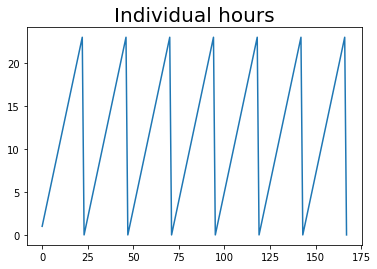

In [5]:
plt.title('Individual hours', size=20)
plt.plot(range(len(df.iloc[-168:])), df.iloc[-168:]['Hour'])

In [6]:
df['Sin_Hour'] = np.sin(2 * np.pi * df['Hour'] / max(df['Hour'])) 
df['Cos_Hour'] = np.cos(2 * np.pi * df['Hour'] / max(df['Hour']))

In [7]:
df.head()

,Datetime,AEP_MW,Hour,Sin_Hour,Cos_Hour
0,2004-12-31 01:00:00,13478.0,1,0.269797,0.962917
1,2004-12-31 02:00:00,12865.0,2,0.519584,0.854419
2,2004-12-31 03:00:00,12577.0,3,0.730836,0.682553
3,2004-12-31 04:00:00,12517.0,4,0.887885,0.460065
4,2004-12-31 05:00:00,12670.0,5,0.979084,0.203456


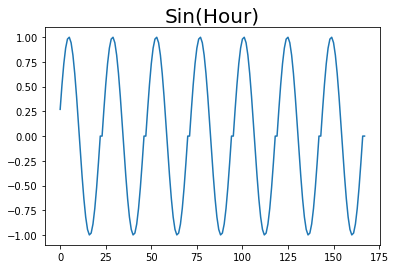

In [8]:
plt.title('Sin(Hour)', size=20)
plt.plot(range(len(df.iloc[-168:])), df.iloc[-168:]['Sin_Hour'])

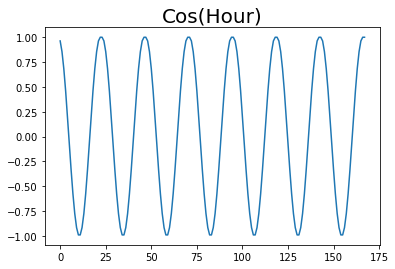

In [9]:
plt.title('Cos(Hour)', size=20)
plt.plot(range(len(df.iloc[-168:])), df.iloc[-168:]['Cos_Hour'])

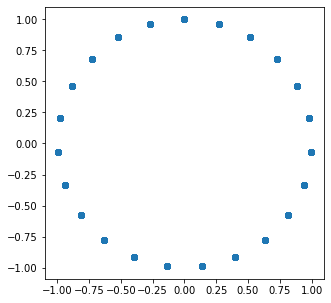

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(df['Sin_Hour'], df['Cos_Hour'])